# Bike Sharing Demand
### Multiple Linear Regression 
### Submitted By:- Aarushi Gupta
**Problem Statement:**
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

**The company wants to know:**
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

**Goal:**
- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

### Loading the relevent libraries

In [1]:
import numpy as np
import pandas as pd
#loading visualization libraries of python
import matplotlib.pyplot as plt
import seaborn as sns
# setting seaborn as the base of matplotlib
sns.set()
%matplotlib inline
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# library for splitting the data in train and test data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
#loading statsmodel library for linear regression
import statsmodels.api as sm
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# loading the VIF library for checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Loading the dataset

In [2]:
# using pandas to read .csv file
bike_data = pd.read_csv('day.csv')

In [3]:
# printing first five rows of our dataset
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#print the shape of the dataset
print(bike_data.shape)

(730, 16)


In [5]:
# printing information about the dataset using info function
print(bike_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


The information contains
- the number of rows: 730
- the number of columns : 16
- column data types: most are float and integer type dataset
- memory usage : 91.4+ KB

In [6]:
#printing descriptive summary of the dataset
#the description contains these information for each numerical column: 
#count - The number of not-empty values, mean, standard deviation, min and max values.
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


There is not much of the difference between the mean and maximum values, thus no outlier is required for the dataset

In [7]:
#checking for null values present in the dataset
print(bike_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


There are no null values present in any column of the dataset

## Dropping irrelevent columns

In [8]:
# printing the number of unique values for each column
print(bike_data.nunique())

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64


There are columns that are not very important for our analysis: 
- instant : It has all unique values, Thus it cannot be used for the modelling
- dteday : This column also have all unique values and since there are already columns for year, month, weekday etc. Thus, it is not required.
- casual and registered : Both the columns given the count for particular category of users which is not actually relevent since our aim is to predict total bike count for both the categories. 

In [9]:
bike_data_new = bike_data.drop(['instant','dteday','casual','registered','atemp'], axis=1)

In [10]:
#printing the new bike data after the columns have been dropped
bike_data_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


### Correlation Matrix

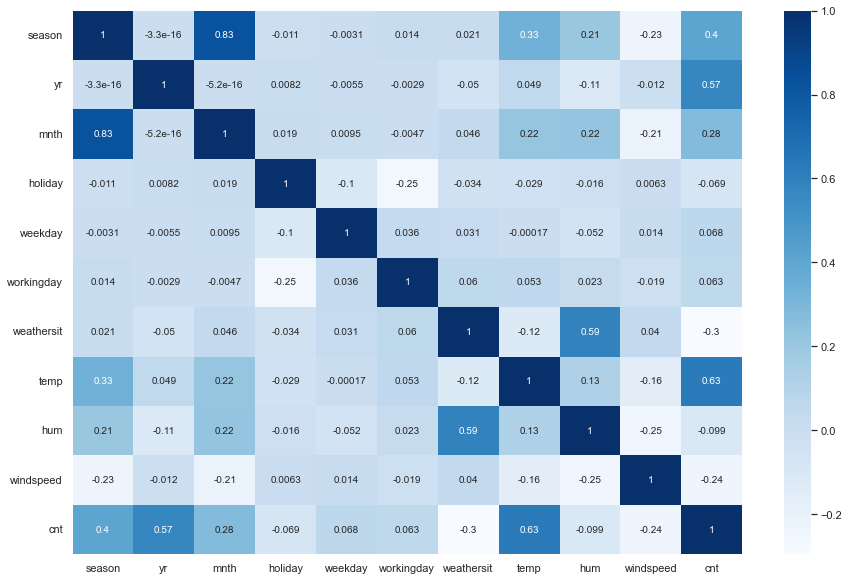

In [11]:
# correlation matrix for getting an idea about the correlations between various variables present.
plt.figure(figsize=[15,10])
sns.heatmap(bike_data_new.corr(), cmap="Blues", annot=True)
plt.show()

The variables that are correlated are:
- year and bike count
- temp and bike count
- month and season
- weather situation and humidity
- season and count

### Data Preparation(Changing into categorical variables)

In [12]:
# making check point for the new dataset that contains categories instead of just numbers
bike_data_categorical = bike_data_new.copy()

In [13]:
# Using map function of python:
# changing seasons into categoreis as given in data dictionary
bike_data_categorical.season = bike_data_categorical.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
# changing weatther situation into categories
bike_data_categorical.weathersit = bike_data_categorical.weathersit.map({1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain',4:'Heavy Snow & Rain'})
# changing weekday from numbers to name abbrevations
bike_data_categorical.weekday = bike_data_categorical.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [14]:
#changing month(in numbers) into name abbrevations
import calendar
bike_data_categorical['mnth'] = bike_data_categorical['mnth'].apply(lambda x: calendar.month_abbr[x])

In [15]:
bike_data_categorical.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


### Exploratory Data Analysis (Data Visualization)

<Figure size 1080x720 with 0 Axes>

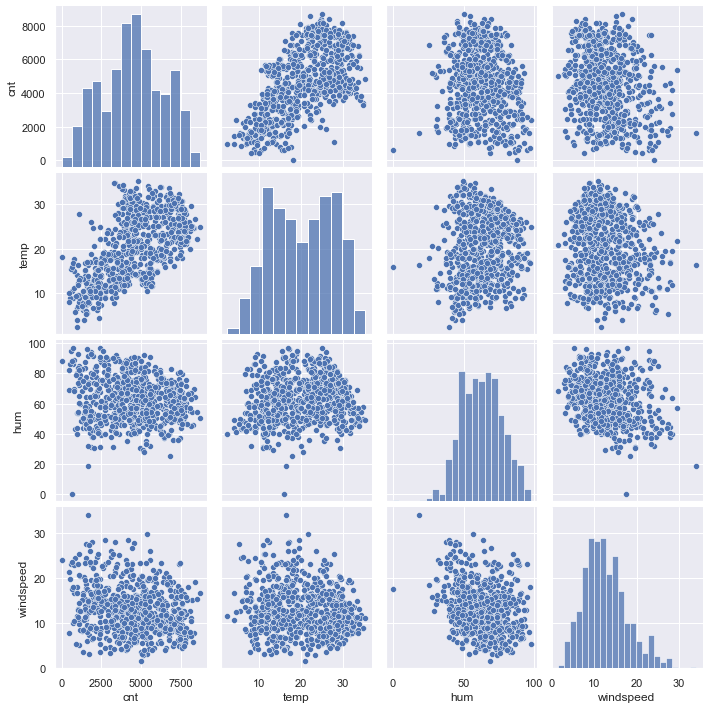

In [16]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,10))
sns.pairplot(data=bike_data_categorical,vars=['cnt', 'temp', 'hum','windspeed'])
plt.show()

<Figure size 1080x720 with 0 Axes>

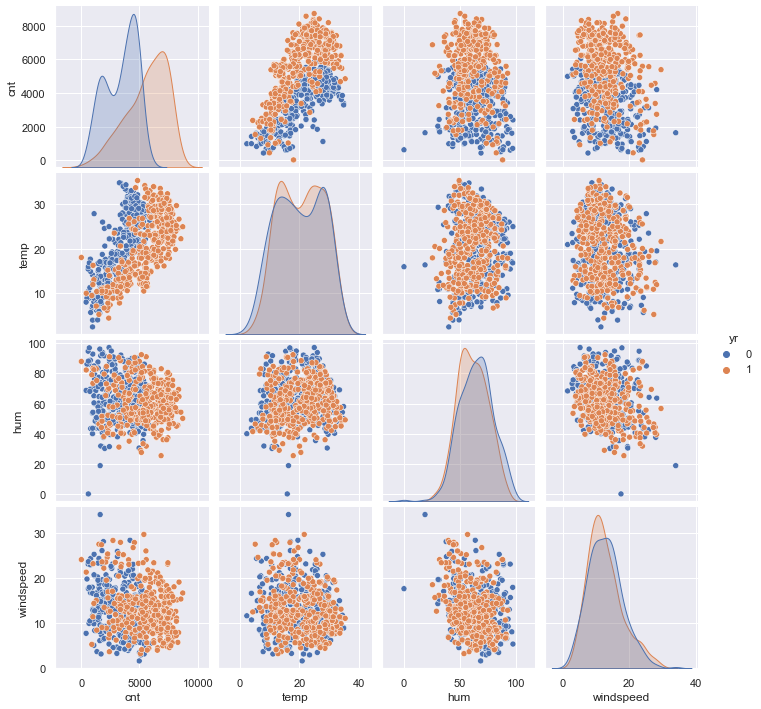

In [17]:
#Draw pairplots for continuous numeric variables using seaborn for year 0(2018) ana 1(2019)
plt.figure(figsize = (15,10))
sns.pairplot(data=bike_data_categorical,vars=['cnt', 'temp', 'hum','windspeed'], hue='yr',)
plt.show()

As can be seen from the pairplots the count is more for the year 2019 than the previous year

<Figure size 1080x720 with 0 Axes>

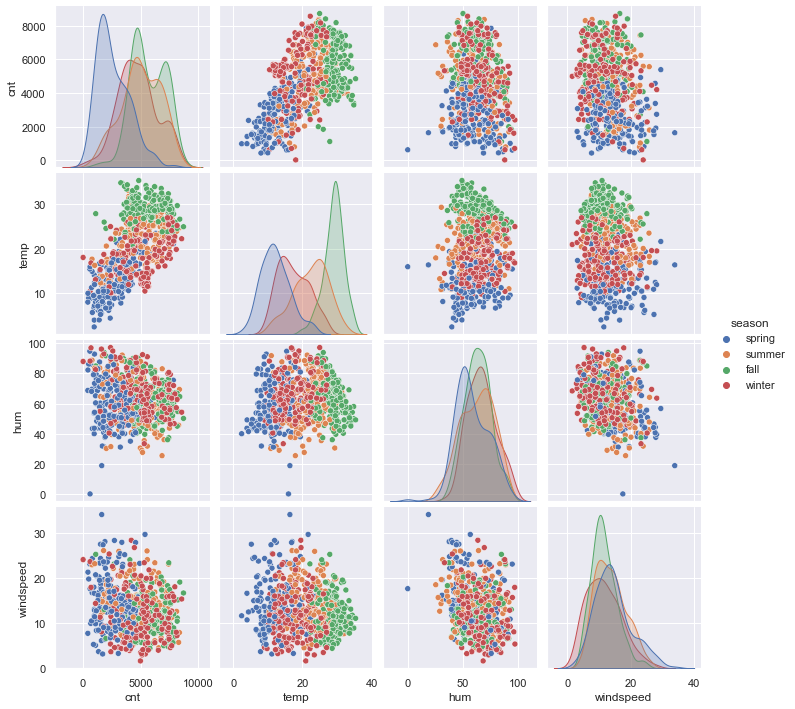

In [18]:
#Draw pairplots for continuous numeric variables using seaborn for various seasons
plt.figure(figsize = (15,10))
sns.pairplot(data=bike_data_categorical,vars=['cnt', 'temp', 'hum','windspeed'], hue='season')
plt.show()

It is evident from the pairplots that for winter season bike counts is less as compared to other seasons

<Figure size 1080x720 with 0 Axes>

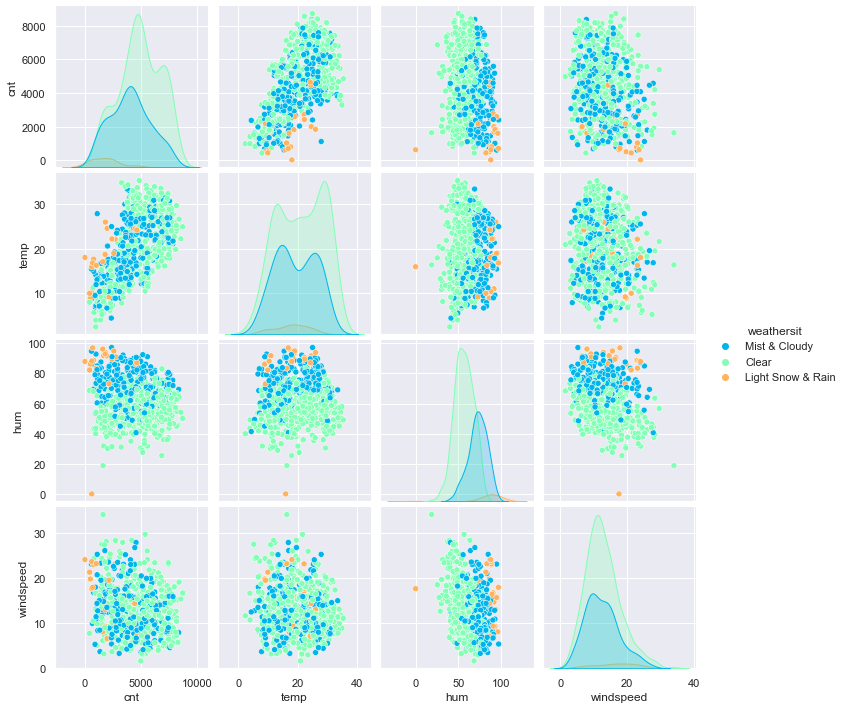

In [19]:
#Draw pairplots for continuous numeric variables using seaborn for various weather situations
plt.figure(figsize = (15,10))
sns.pairplot(data=bike_data_categorical,vars=['cnt', 'temp', 'hum','windspeed'], hue='weathersit', palette="rainbow")
plt.show()

The bike count decreases significantly for mist and cloudy weather and even lesser for light snow and rainy weather.

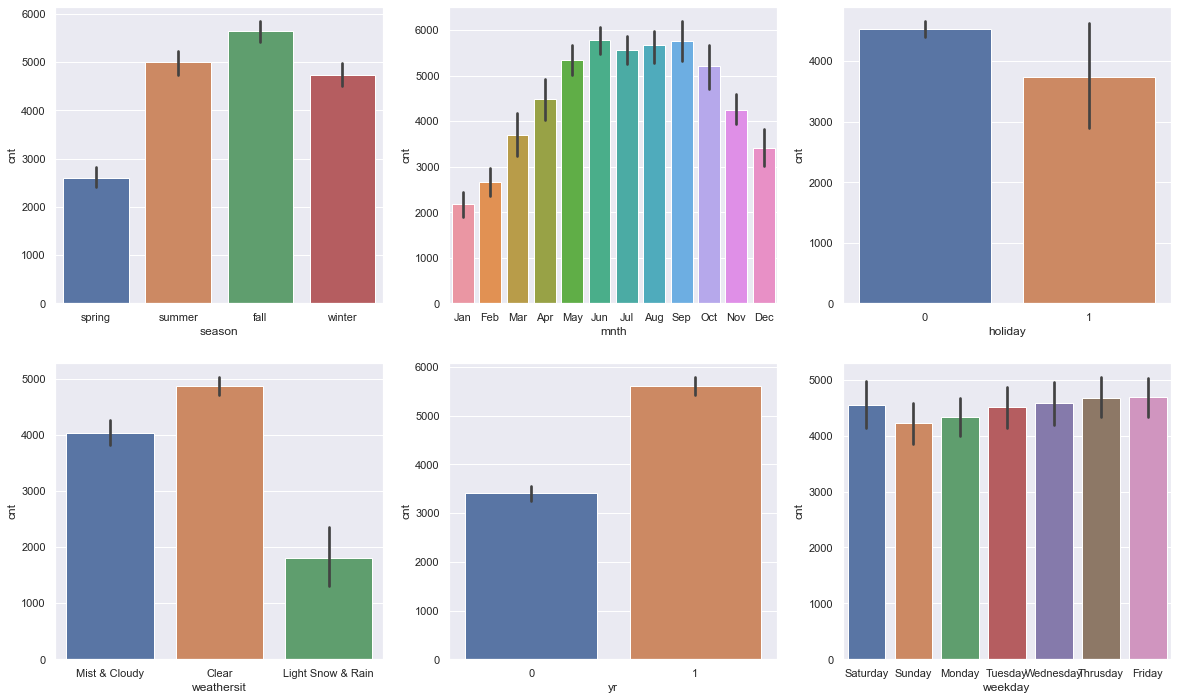

In [20]:
#using barplots to check count for each categories in the dataset 
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x = 'season', y = 'cnt', data = bike_data_categorical)
plt.subplot(2,3,2)
sns.barplot(x = 'mnth', y = 'cnt', data = bike_data_categorical)
plt.subplot(2,3,3)
sns.barplot(x = 'holiday', y = 'cnt', data = bike_data_categorical)
plt.subplot(2,3,4)
sns.barplot(x = 'weathersit', y = 'cnt', data = bike_data_categorical)
plt.subplot(2,3,5)
sns.barplot(x = 'yr', y = 'cnt', data = bike_data_categorical)
plt.subplot(2,3,6)
sns.barplot(x = 'weekday', y = 'cnt', data = bike_data_categorical)
plt.show()

### Creating Dummy Variables

In [21]:
#creating dummy variables for season , mnth ,weathersit ,weekday
dummy_cols = bike_data_categorical[['season','mnth','weekday','weathersit']]
# dropping the first category since it might cause multicollinearity while building the model and saving it to new dataframe
bike_data_dummy = pd.get_dummies(dummy_cols, drop_first=True)

In [22]:
# checking the columns that are created after dealing with dummy variables
bike_data_dummy.columns

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [23]:
# creating another check point
bike_data_final = bike_data_categorical.copy()

In [24]:
## adding dataframe wirh dummy variables to original dataset
bike_data_final = pd.concat([bike_data_final,bike_data_dummy],axis = 1)

In [25]:
bike_data_final.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [26]:
# dropping all those columns for which dummy variables were created from the above method
bike_data_final = bike_data_final.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1)

In [27]:
#printing the final dataset after all the data handling steps
bike_data_final.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
#checking the shape of the final dataset
bike_data_final.shape

(730, 29)

Thus our final cleaned dataset contains 730 rows and 31 columns which are then further scaled and used in the model

### Splitting the data into training and test dataset

In [29]:
# using Train Test split from sklearn with 70:30 split ratio (test size = 30% of original dataset)
# using random_state so that everytime we run this code, we get the same shuffled sequence of our training and test set
train_df , test_df = train_test_split(bike_data_final, test_size=0.3, random_state=100)

In [30]:
# checking the size of train and test data
print('Train data size is :',train_df.shape)
print('Test data size is :',test_df.shape)

Train data size is : (511, 29)
Test data size is : (219, 29)


### Rescaling the features (MinMaxScaler)
Rescaling transformer given varibles into features that are scaled in particular range. In this case MinMaxScaler scales the features between 0 and 1

In [31]:
# creating instance of the class MinMaxScaler()
scaler = MinMaxScaler()

In [32]:
# we do not need to scale dummy variables as they only have values 0 and 1
# using fit-transform on training set while transform is used for test data which scales the parameters learned on train data
df_train_scaled = train_df.copy()
# list of columns to be scaled
num_vars = ['cnt','temp', 'hum', 'windspeed']
# fitting and transforming the above variables 
df_train_scaled[num_vars] = scaler.fit_transform(df_train_scaled[num_vars])

In [33]:
# printing the first five lines of scaled data
df_train_scaled.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


As can be seen all the variables are scaled between 0 and 1 and can further be used in the model

### Model Building

In [34]:
# declaring dependent and independent variables
# Here 'cnt' is the dependent or target variables whose value is to be predicted 
# Rest other variables are independent variables which affect the count variable
X_train = df_train_scaled.drop(['cnt'],axis=1)
y_train = df_train_scaled['cnt']

### Model 1
Using the statsmodel library of python for linear regression in this project. Statsmodel is used in python to perform statistical tests and estimate statistical model. Here we are using OLS (Ordinary Least Squares) for evaluating linear regression model. This method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line.

First, we build the very basic model which includes all the variables present in the dataset

In [35]:
# adds a column of ones to the X_train array
X_train_sm1 = sm.add_constant(X_train)
#creating first model using OLS
lr1 = sm.OLS(y_train, X_train_sm1)
#fitting the model
lr_model1 = lr1.fit()

In [36]:
# printing the summary obtained through our first model
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.6
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          7.98e-182
Time:                        16:15:50   Log-Likelihood:                 527.76
No. Observations:                 511   AIC:                            -999.5
Df Residuals:                     483   BIC:                            -880.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2436      0.035      6.899      0.000       0.174       0.313
yr                               0.2329      0.008     28.888      0.000       0.217       0.249
holiday                          0.0102      0.024      0.425      0.671      -0.037       0.057
workingday                       0.0964      0.012      7.846      0.000       0.072       0.120
temp                             0.4446      0.046      9.607      0.000       0.354       0.536
hum                             -0.1525      0.039     -3.955      0.000      -0.228      -0.077
windspeed                       -0.1862      0.026     -7.231      0.000      -0.237      -0.136
season_spring                   -0.0449      0.030     -1.498      0.135      -0.104       0.014
season_summer                    0.0430      0.026      1.645      0.101      -0.008       0.094
season_winter                    0.1075      0.028      3.845      0.000       0.053       0.162
mnth_Aug                         0.0207      0.034      0.617      0.538      -0.045       0.087
mnth_Dec                        -0.0440      0.034     -1.307      0.192      -0.110       0.022
mnth_Feb                        -0.0325      0.033     -0.985      0.325      -0.097       0.032
mnth_Jan                        -0.0632      0.034     -1.882      0.060      -0.129       0.003
mnth_Jul                        -0.0336      0.035     -0.962      0.337      -0.102       0.035
mnth_Jun                         0.0049      0.025      0.197      0.844      -0.044       0.054
mnth_Mar                         0.0014      0.025      0.056      0.955      -0.047       0.050
mnth_May                         0.0249      0.021      1.184      0.237      -0.016       0.066
mnth_Nov                        -0.0396      0.036     -1.089      0.277      -0.111       0.032
mnth_Oct                         0.0106      0.036      0.295      0.768      -0.060       0.081
mnth_Sep                         0.0864      0.032      2.704      0.007       0.024       0.149
weekday_Monday                  -0.0210      0.015     -1.371      0.171      -0.051       0.009
weekday_Saturday                 0.0957      0.014      6.964      0.000       0.069       0.123
weekday_Sunday                   0.0414      0.014      2.964      0.003       0.014       0.069
weekday_Thrusday                -0.0091      0.016     -0.584      0.559      -0.040       0.021
weekday_Tuesday                 -0.0163      0.015     -1.055      0.292      -0.047       0.014
weekday_Wednesday               -0.0055      0.015     -0.366      0.715      -0.035       0.024
weathersit_Light Snow & Rain    -0.2565      0.026     -9.720      0.000      -0.308      -0.205
weathersit_Mist & Cloudy        -0.0598      0.010     -5.733      0.000    

### Model based on RFE

The above model have lot of features from which only some features are significant. Thus, RFE method can be used to solve this issue to some level. RFE(Recursive Feature Elimination) is a feature selection method that fits a model and gives the strongest features according to the specified number of features to be selected

In [37]:
# Running RFE with the output number of the variable equal to 14
# Here we have used sklearn library for linear regression model and RFE
lm = LinearRegression()
lm.fit(X_train, y_train)
# specifying the number of features to be selected 
rfe = RFE(lm, n_features_to_select=14) 
# running RFE
rfe = rfe.fit(X_train, y_train)

In [38]:
# printing the list of columns selected by RFE and along with their weights and ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 2),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 11),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 15),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thrusday', False, 14),
 ('weekday_Tuesday', False, 13),
 ('weekday_Wednesday', False, 10),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1)]

In [39]:
# Keeping only those features that are True (or strong) according to RFE
cols = X_train.columns[rfe.support_]

In [40]:
# we get all the 15 important features that are used further for the analysis
print(cols)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_Jul', 'mnth_Sep',
       'weekday_Saturday', 'weekday_Sunday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')


In [41]:
# The feature that are considered weak by RFE are also printed here
X_train.columns[~rfe.support_]

Index(['season_spring', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Monday', 'weekday_Thrusday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

In [42]:
# Defining new independent variables for model training by keeping only those features that are supported by RFE
X_train_rfe = X_train[cols]

### Model 2
In the second model we train our model on only those features that are declared relevent by Recursive Feature Selection(RFE)

In [43]:
X_train_lm2 = sm.add_constant(X_train_rfe)
# fitting the train data
lm2 = sm.OLS(y_train,X_train_lm2).fit()
# printing the summary
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          1.72e-191
Time:                        16:15:50   Log-Likelihood:                 514.37
No. Observations:                 511   AIC:                            -1001.
Df Residuals:                     497   BIC:                            -941.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1529      0.022      7.006      0.000       0.110       0.196
yr                               0.2288      0.008     28.404      0.000       0.213       0.245
holiday                         -0.0318      0.021     -1.522      0.129      -0.073       0.009
workingday                       0.0730      0.009      8.286      0.000       0.056       0.090
temp                             0.5950      0.022     26.694      0.000       0.551       0.639
hum                             -0.1732      0.037     -4.633      0.000      -0.247      -0.100
windspeed                       -0.1880      0.025     -7.386      0.000      -0.238      -0.138
season_summer                    0.0817      0.011      7.696      0.000       0.061       0.103
season_winter                    0.1369      0.010     13.138      0.000       0.116       0.157
mnth_Jul                        -0.0456      0.018     -2.547      0.011      -0.081      -0.010
mnth_Sep                         0.0944      0.016      5.927      0.000       0.063       0.126
weekday_Saturday                 0.0825      0.011      7.517      0.000       0.061       0.104
weekday_Sunday                   0.0292      0.012      2.515      0.012       0.006       0.052
weathersit_Light Snow & Rain    -0.2405      0.026     -9.179      0.000      -0.292      -0.189
weathersit_Mist & Cloudy        -0.0543      0.010     -5.206      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       59.191   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.084
Skew:                          -0.646   Prob(JB):                     2.53e-28
Kurtosis:                       5.073   Cond. No.                     1.22e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  1e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- 'holiday' has high p value(>0.05)- hence not significant variable for predicting the bike count

In [44]:
# dropping the holiday column
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

### Model 3

In [45]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new)

lm3 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model

lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          1.72e-191
Time:                        16:15:50   Log-Likelihood:                 514.37
No. Observations:                 511   AIC:                            -1001.
Df Residuals:                     497   BIC:                            -941.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1212      0.036      3.359      0.001       0.050       0.192
yr                               0.2288      0.008     28.404      0.000       0.213       0.245
workingday                       0.1048      0.026      4.100      0.000       0.055       0.155
temp                             0.5950      0.022     26.694      0.000       0.551       0.639
hum                             -0.1732      0.037     -4.633      0.000      -0.247      -0.100
windspeed                       -0.1880      0.025     -7.386      0.000      -0.238      -0.138
season_summer                    0.0817      0.011      7.696      0.000       0.061       0.103
season_winter                    0.1369      0.010     13.138      0.000       0.116       0.157
mnth_Jul                        -0.0456      0.018     -2.547      0.011      -0.081      -0.010
mnth_Sep                         0.0944      0.016      5.927      0.000       0.063       0.126
weekday_Saturday                 0.1143      0.027      4.232      0.000       0.061       0.167
weekday_Sunday                   0.0609      0.027      2.244      0.025       0.008       0.114
weathersit_Light Snow & Rain    -0.2405      0.026     -9.179      0.000      -0.292      -0.189
weathersit_Mist & Cloudy        -0.0543      0.010     -5.206      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       59.191   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.084
Skew:                          -0.646   Prob(JB):                     2.53e-28
Kurtosis:                       5.073   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.59
1,workingday,15.46
2,temp,10.56
4,windspeed,4.34
9,weekday_Saturday,4.20
10,weekday_Sunday,4.14
12,weathersit_Mist & Cloudy,2.19
0,yr,2.06
5,season_summer,1.76
6,season_winter,1.71


- 'hum' has high multicollinearity(high VIF). Thus, it is good to drop this variable

In [47]:
#dropping atemp from the model
X_train_new = X_train_new.drop(['hum'], axis=1)

### Model 4

In [48]:
# Adding a constant variable 
X_train_lm4 = sm.add_constant(X_train_new)
# fitting the model
lm4 = sm.OLS(y_train,X_train_lm4).fit()   # Running the linear model
# printing the summary
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.9
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          4.01e-188
Time:                        16:15:51   Log-Likelihood:                 503.57
No. Observations:                 511   AIC:                            -981.1
Df Residuals:                     498   BIC:                            -926.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0221      0.030      0.745      0.457      -0.036       0.080
yr                               0.2329      0.008     28.503      0.000       0.217       0.249
workingday                       0.1060      0.026      4.066      0.000       0.055       0.157
temp                             0.5687      0.022     25.859      0.000       0.525       0.612
windspeed                       -0.1548      0.025     -6.211      0.000      -0.204      -0.106
season_summer                    0.0806      0.011      7.441      0.000       0.059       0.102
season_winter                    0.1281      0.010     12.257      0.000       0.108       0.149
mnth_Jul                        -0.0383      0.018     -2.108      0.036      -0.074      -0.003
mnth_Sep                         0.0903      0.016      5.565      0.000       0.058       0.122
weekday_Saturday                 0.1174      0.028      4.262      0.000       0.063       0.171
weekday_Sunday                   0.0587      0.028      2.120      0.035       0.004       0.113
weathersit_Light Snow & Rain    -0.2880      0.025    -11.708      0.000      -0.336      -0.240
weathersit_Mist & Cloudy        -0.0819      0.009     -9.401      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       59.483   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.580
Skew:                          -0.652   Prob(JB):                     3.26e-28
Kurtosis:                       5.060   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,8.97
2,temp,8.78
3,windspeed,4.34
8,weekday_Saturday,2.79
9,weekday_Sunday,2.63
0,yr,2.06
4,season_summer,1.76
5,season_winter,1.58
11,weathersit_Mist & Cloudy,1.58
6,mnth_Jul,1.53


- 'working day' has high VIF(>5). It is advisable to drop this variable

In [50]:
# dropping the 'Weekday_Sunday' variable
X_train_new = X_train_new.drop(['workingday'], axis=1)

### Model 5

In [51]:
# Adding a constant variable 
X_train_lm5 = sm.add_constant(X_train_new)
# fitting the model
lm5 = sm.OLS(y_train,X_train_lm5).fit()   # Running the linear model
# printing the summary
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.9
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          8.59e-186
Time:                        16:15:51   Log-Likelihood:                 495.23
No. Observations:                 511   AIC:                            -966.5
Df Residuals:                     499   BIC:                            -915.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1215      0.017      7.142      0.000       0.088       0.155
yr                               0.2334      0.008     28.128      0.000       0.217       0.250
temp                             0.5732      0.022     25.700      0.000       0.529       0.617
windspeed                       -0.1573      0.025     -6.217      0.000      -0.207      -0.108
season_summer                    0.0823      0.011      7.492      0.000       0.061       0.104
season_winter                    0.1269      0.011     11.955      0.000       0.106       0.148
mnth_Jul                        -0.0370      0.018     -2.005      0.045      -0.073      -0.001
mnth_Sep                         0.0872      0.016      5.296      0.000       0.055       0.120
weekday_Saturday                 0.0154      0.012      1.334      0.183      -0.007       0.038
weekday_Sunday                  -0.0432      0.012     -3.603      0.000      -0.067      -0.020
weathersit_Light Snow & Rain    -0.2831      0.025    -11.348      0.000      -0.332      -0.234
weathersit_Mist & Cloudy        -0.0799      0.009     -9.048      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       71.582   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.648
Skew:                          -0.751   Prob(JB):                     7.92e-36
Kurtosis:                       5.310   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.14
2,windspeed,3.17
0,yr,2.01
3,season_summer,1.76
5,mnth_Jul,1.52
10,weathersit_Mist & Cloudy,1.49
4,season_winter,1.47
6,mnth_Sep,1.29
7,weekday_Saturday,1.21
8,weekday_Sunday,1.19


- 'Weekday_Saturday' has high p value and low VIF. high p-value is preferred more. Thus this variable is insignificant for out model

In [53]:
# dropping hum from the model
X_train_new = X_train_new.drop(['weekday_Saturday'], axis=1)

### Model 6

In [54]:
# Adding a constant variable 
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lm6 = sm.OLS(y_train,X_train_lm6).fit()

lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.0
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          1.29e-186
Time:                        16:15:51   Log-Likelihood:                 494.32
No. Observations:                 511   AIC:                            -966.6
Df Residuals:                     500   BIC:                            -920.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1244      0.017      7.368      0.000       0.091       0.158
yr                               0.2330      0.008     28.078      0.000       0.217       0.249
temp                             0.5722      0.022     25.650      0.000       0.528       0.616
windspeed                       -0.1558      0.025     -6.158      0.000      -0.205      -0.106
season_summer                    0.0822      0.011      7.475      0.000       0.061       0.104
season_winter                    0.1271      0.011     11.971      0.000       0.106       0.148
mnth_Jul                        -0.0364      0.018     -1.973      0.049      -0.073      -0.000
mnth_Sep                         0.0872      0.016      5.293      0.000       0.055       0.120
weekday_Sunday                  -0.0460      0.012     -3.896      0.000      -0.069      -0.023
weathersit_Light Snow & Rain    -0.2829      0.025    -11.332      0.000      -0.332      -0.234
weathersit_Mist & Cloudy        -0.0799      0.009     -9.038      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       67.566   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.115
Skew:                          -0.700   Prob(JB):                     4.63e-35
Kurtosis:                       5.338   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.11
2,windspeed,3.10
0,yr,2.01
3,season_summer,1.76
5,mnth_Jul,1.52
9,weathersit_Mist & Cloudy,1.49
4,season_winter,1.46
6,mnth_Sep,1.29
7,weekday_Sunday,1.16
8,weathersit_Light Snow & Rain,1.08


All the above variable are significant but 'temp' has a little high VIF. From the logical sense temperature can be significant variable for predicting bike count. Thus we cannot drop this variable

The above Model 6 can be used as a final model for making predictions and evaluation of the model.

This is our final model where all the p values are less than 0.05 all VIFs less than 5. We can thus say that the remaining variables are significant as well as does not cause multicollinearity.

In [56]:
# Create a regression summary where we can compare them with one-another
reg_summary=pd.DataFrame(X_train_lm6.columns.values,columns=['Features'])
reg_summary['Weights']=lm6.params.values
reg_summary

,Features,Weights
0,const,0.124439
1,yr,0.233025
2,temp,0.572184
3,windspeed,-0.155756
4,season_summer,0.082185
5,season_winter,0.127112
6,mnth_Jul,-0.036441
7,mnth_Sep,0.087217
8,weekday_Sunday,-0.045995
9,weathersit_Light Snow & Rain,-0.282940


cnt = 0.124239 + (yr × 0.233025) + (temp × 0.572184) − (windspeed × 0.155756) + (season_winter × 0.127112) - (season_summer × 0.082185) + (mnth_Sep × 0.087217) - (mnth_Jul × 0.036441)- (weathersit_Light Snow and Rain × 0.282940) − (weathersit_Mist & Cloudy × 0.079913) - (weekday_Sunday × 0.045995)

### Residual Analysis of Training dataset

In [57]:
y_train_cnt = lm6.predict(X_train_lm6)

Text(0.5, 1.0, 'Residuals PDF')

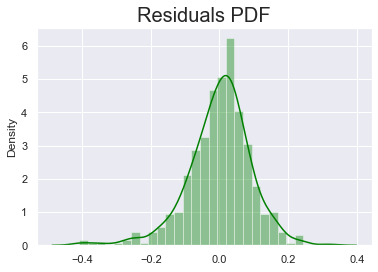

In [58]:
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train-y_train_cnt, color='green')
plt.title('Residuals PDF',fontsize=20)

# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)

From the above distribution plot, it can be seen that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

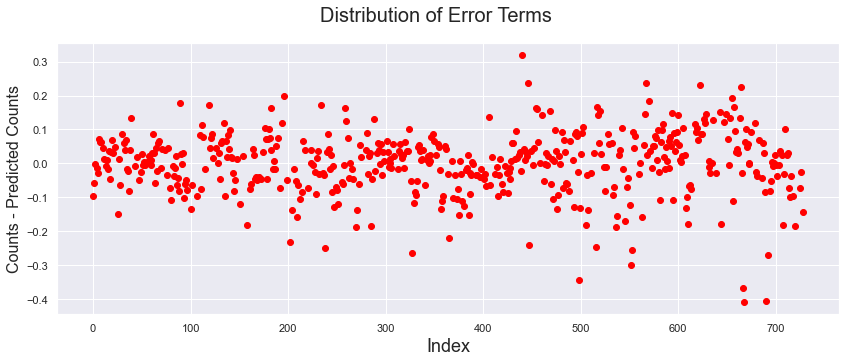

In [59]:
fig = plt.figure(figsize=(14,5))
plt.plot(y_train-y_train_cnt, color="red", marker='o', linewidth=2.5, linestyle="")
fig.suptitle('Distribution of Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label
plt.show()

As can be seen, the error terms are randomly distributed with no visible pattern which means the output is explained well by the model and there are no other parameters(or variables) that can explain the model better.

### Making Predictions Using Final Model

In [60]:
# Scaling the test data using transform function
num_vars = ['cnt','temp', 'hum', 'windspeed']
# making the copy of test data
df_test_scaled = test_df.copy()
# tranforming the test set
df_test_scaled[num_vars] = scaler.transform(df_test_scaled[num_vars])

In [61]:
#printing first few rows of scaled test data
df_test_scaled.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [62]:
# declaring dependent and independent variables
X_test = df_test_scaled.drop(['cnt'], axis=1)
y_test = df_test_scaled['cnt']

In [63]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)
# printing the columns of test data
print(X_test_lm.columns)

Index(['const', 'yr', 'temp', 'windspeed', 'season_summer', 'season_winter',
       'mnth_Jul', 'mnth_Sep', 'weekday_Sunday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy'],
      dtype='object')


In [64]:
# Making predictions using the final model (lm9)
y_pred = lm6.predict(X_test_lm)

### R^2 score for test

In [65]:
r2_score(y_test, y_pred)

0.7922123000533647

### Plot for Homoscedasticity

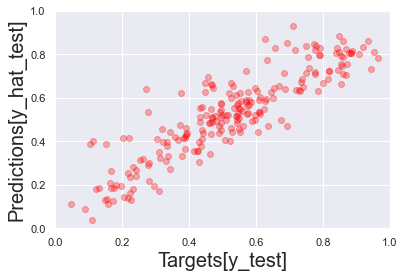

In [66]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test,y_pred,color='red',alpha=0.3)
plt.xlabel('Targets[y_test]',fontsize=20)
plt.ylabel('Predictions[y_hat_test]',fontsize=20)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

From the above plot we can see that variance of the residuals (error terms) is constant across predictions which means the error term does not vary much as the value of the predictor variable changes. The slope of straight line passing through the origin will make angle of 45 degrees which is basically a good fit.

In [67]:
# To obtain the actual count, reverse transform the predictions obtained
# creating a new dataframe
df_pf=pd.DataFrame(y_pred,columns=['Predictions'])

In [68]:
# also include test targets in that data frame
df_pf['Target']=y_test
df_pf.head()

,Predictions,Target
184,0.470900,0.692706
535,0.931445,0.712034
299,0.412520,0.303382
221,0.576000,0.547400
152,0.590533,0.569029


In [69]:
# function to inverse transform of MinMaxScaler variables
def rev_min_max_func(scaled_val):
    max_val = max(train_df['cnt'])
    min_val = min(train_df['cnt'])
    og_val = (scaled_val * (max_val - min_val)) + min_val
    return og_val    

In [70]:
# applying the above function for both the target and prediction variables
df_pf['Target'] = df_pf['Target'].apply(lambda x: rev_min_max_func(x))
df_pf['Predictions'] = df_pf['Predictions'].apply(lambda x: rev_min_max_func(x))

In [71]:
df_pf.head()

,Predictions,Target
184,4115.063122,6043.0
535,8118.116374,6211.0
299,3607.626972,2659.0
221,5028.592613,4780.0
152,5154.909208,4968.0


In [72]:
# calculating difference between the target and predictions which is residuals
df_pf['Residuals']=df_pf['Target']-df_pf['Predictions']
df_pf.head()

,Predictions,Target,Residuals
184,4115.063122,6043.0,1927.936878
535,8118.116374,6211.0,-1907.116374
299,3607.626972,2659.0,-948.626972
221,5028.592613,4780.0,-248.592613
152,5154.909208,4968.0,-186.909208


In [73]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference %']=round(np.absolute(df_pf['Residuals']/df_pf['Target']*100),2)
df_pf.head()

,Predictions,Target,Residuals,Difference %
184,4115.063122,6043.0,1927.936878,31.90
535,8118.116374,6211.0,-1907.116374,30.71
299,3607.626972,2659.0,-948.626972,35.68
221,5028.592613,4780.0,-248.592613,5.20
152,5154.909208,4968.0,-186.909208,3.76


In [74]:
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference %']).head()

,Predictions,Target,Residuals,Difference %
614,7502.918501,7504.0,1.081499,0.01
105,793.353715,795.0,1.646285,0.21
400,2926.542004,2947.0,20.457996,0.69
395,4540.627579,4509.0,-31.627579,0.70
46,2099.778518,2115.0,15.221482,0.72


## Conclusions

#### Final Result Comparison
$$
Train Data: {R^2}=83.4 \\
Test Data: {R^2}=79.4 \\
$$
This seems to be a really good model that can be generalized for other datasets as well

#### Equation for best fitted line is :

cnt = 0.124239 + (yr × 0.233025) + (temp × 0.572184) − (windspeed × 0.155756) + (season_winter × 0.127112) - (season_summer × 0.082185) + (mnth_Sep × 0.087217) - (mnth_Jul × 0.036441)- (weathersit_Light Snow and Rain × 0.282940) − (weathersit_Mist & Cloudy × 0.079913) - (weekday_Sunday × 0.045995)

#### Interpretation of coefficients

**yr**: Bike hire number is more for year 2019 and compared to 2018. Thus, there is a boom of bike hiring with each passing year.

**temp**: A positive coefficient indicates that bike hire increases with increase in temperature. 

**windspeed**: Bike hire count decreases with an increase in windspeed. Since, Fast moving winds can affect the ride.

**season_winter**: Bike hire count increases by 0.127112 units in winter season as compared to autumn season.

**season_summer**: Bike hire count decreases by 0.0821 units in summer season. Thus, company needs to focus more on expanding business during summer season.

**mnth_Sep & mnth_Jul**: Positive coefficients for september indicates that the bike hire count increases for these two months. Thus, company can focus more on this month and make the business expand.Negative coefficient for July month indicates that the company should distribute vouchers in order to increase the sales on July month 

**weathersit_Light Snow and Rain & weathersit_Mist & Cloudy** : Negative coefficients for these weather situations indicates that for light snow, rainy and misty weather bike hire counts decreases. This is obvious from the fact that it is risky to ride bikes in these weather situations.

**weekday_Sunday**: Bike hire counts decreases for Sunday. This can be evident from the fact that people hike bikes to travel to their offices during weekdays and in weekends bike hire count decreases. 